### MOUGNUTOU YONE GUY CHRISTIAN SQL

## **[Objectif: Maîtriser SQL]()** 
#### Le projet de cette semaine porte sur le SQL et la manipulation des bases des données relationnelles
#### Date de soumission: jeudi 15 juin 2023 à 22 H
## Note = 73/100


##### Nous travaillerons dans cette partie avec une base des données du championnat de baskett ball américain (NBA)
##### Cette base est au format compressé et disponible publiquement dans kaggle et  accessible à l'adresse:
- [baskettball_data (url)](https://drive.google.com/file/d/17T1SQdChPn6JTpdLnd8VGWSOVGeWCL6W/view?usp=sharing)
- Vous devez obtenir une version décompresser directement dans votre environement de travail ou dans votre disque local

##### Use this screen shot from stack Exchange to download the notebook in your personnel computer
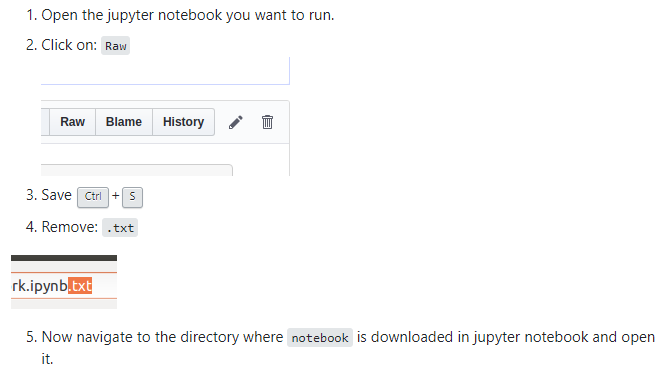
###### complementary notes
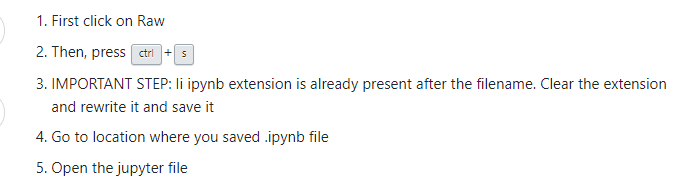

##### `Importer les librairies necéssaires pour travailler avec une application de gestion SQL avec python (sqlite3)`

In [51]:
import sqlite3
import pandas as pd

**Tâche 1.1:** Initialiser sqlite3 et accéder à la base des données

In [52]:
## Vous devez modifier la séquence suivante (Users/DDD/Downloads/basketball.sqlite/basketball.sqlite) 
# en fonction de la localisation du fichier dans votre ordinateur
%load_ext sql
%sql sqlite:////Users/GSI/Desktop/basketball.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Tâche 1.2:** Faire votre première réquête dans la base en affichant son contenu
- [SQL: exposé de compréhension](https://www.i3s.unice.fr/~edemaria/cours/c4.pdf)
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)
- Pour communiquer avec sqlite, chaque cellule de codes de jupyter doit commencer par '%%sql'

##### Utiliser la fonction SELECT  pour avoir accés aux informations et tables de la base

In [53]:
%%sql

SELECT *
FROM sqlite_schema

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+-------+-----------------------+-----------------------+----------+--------------------------------------------+
|  type |          name         |        tbl_name       | rootpage |                    sql                     |
+-------+-----------------------+-----------------------+----------+--------------------------------------------+
| table |         Player        |         Player        |    2     |          CREATE TABLE "Player" (           |
|       |                       |                       |          |                 "id" TEXT,                 |
|       |                       |                       |          |              "full_name" TEXT,             |
|       |                       |                       |          |              "first_name" TEXT,            |
|       |                       |                       |          |              "last_name" TEXT,             |
|       |                       |                       |          |             "is_active" INTEGER            |
|       |                       |                       |          |                     )                      |
| table |          Team         |          Team         |    4     |           CREATE TABLE "Team" (            |
|       |                       |                       |          |                 "id" TEXT,                 |
|       |                       |                       |          |              "full_name" TEXT,             |
|       |                       |                       |          |             "abbreviation" TEXT,           |
|       |                       |                       |          |               "nickname" TEXT,             |
|       |                       |                       |          |                 "city" TEXT,               |
|       |                       |                       |          |                "state" TEXT,               |
|       |                       |                       |          |            "year_founded" INTEGER          |
|       |                       |                       |          |                     )                      |
| table |    Team_Attributes    |    Team_Attributes    |    5     |      CREATE TABLE "Team_Attributes" (      |
|       |                       |                       |          |                 "ID" TEXT,                 |
|       |                       |                       |          |             "ABBREVIATION" TEXT,           |
|       |                       |                       |          |               "NICKNAME" TEXT,             |
|       |                       |                       |          |             "YEARFOUNDED" TEXT,            |
|       |                       |                       |          |                 "CITY" TEXT,               |
|       |                       |                       |          |                "ARENA" TEXT,               |
|       |                       |                       |          |            "ARENACAPACITY" REAL,           |
|       |                       |                       |          |                "OWNER" TEXT,               |
|       |                       |                       |          |            "GENERALMANAGER" TEXT,          |
|       |                       |                       |          |              "HEADCOACH" TEXT,             |
|       |                       |                       |          |          "DLEAGUEAFFILIATION" TEXT,        |
|       |                       |                       |          |        "FACEBOOK_WEBSITE_LINK" TEXT,       |
|       |                       |                       |          |        "INSTAGRAM_WEBSITE_LINK" TEXT,      |
|       |                       |                       |          |         "TWITTER_WEBSITE_LINK" TEXT        |
|       |                       |                       |          |                     )                      |
| table | 

##### Cette table contient l'arborescence des tables et des informations contenues dans ces tables relationnelles

**Task 1.3:** Selectionner toutes les tables de la base
- Compléter le code ci-dessous en utilisant la fonction 'WHERE'
- [SQLite tutorial](https://www.sqlitetutorial.net/sqlite-select/)

##### WHERE permet de filtrer les lignes d'une table selon un certain critère.

In [54]:
%%sql
SELECT  name 
FROM sqlite_schema
WHERE name = tbl_name

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+-----------------------+
|          name         |
+-----------------------+
|         Player        |
|          Team         |
|    Team_Attributes    |
|      Team_History     |
|   Player_Attributes   |
|     Game_Officials    |
| Game_Inactive_Players |
|      Team_Salary      |
|     Player_Salary     |
|         Draft         |
+-----------------------+

**Task 1.4:** Select all columns from the `Player` table and from `Player_salary`, limiting your results to the first five rows. Use two separate cells to execute your code
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [55]:
%%sql
SELECT *
FROM Player
lIMIT 5

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+-------+---------------------+------------+--------------+-----------+
|   id  |      full_name      | first_name |  last_name   | is_active |
+-------+---------------------+------------+--------------+-----------+
| 76001 |    Alaa Abdelnaby   |    Alaa    |  Abdelnaby   |     0     |
| 76002 |   Zaid Abdul-Aziz   |    Zaid    |  Abdul-Aziz  |     0     |
| 76003 | Kareem Abdul-Jabbar |   Kareem   | Abdul-Jabbar |     0     |
|   51  |  Mahmoud Abdul-Rauf |  Mahmoud   |  Abdul-Rauf  |     0     |
|  1505 |  Tariq Abdul-Wahad  |   Tariq    | Abdul-Wahad  |     0     |
+-------+---------------------+------------+--------------+-----------+

In [56]:
%%sql
SELECT *
FROM Player_salary
lIMIT 5

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
| slugSeason |    nameTeam   |     namePlayer    |  statusPlayer  | isFinalSeason | isWaived | isOnRoster | isNonGuaranteed | isTeamOption | isPlayerOption | typeContractDetail |   value    |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
|  2020-21   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2021-22   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2022-23   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2023-24   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       1       |    0     |     1      |        0        |      0       |       1        |   Player Option    | 18000000.0 |
|  2020-21   | Atlanta Hawks |  Brandon Goodwin  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1701593.0  |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+

**Task 1.5:** How many observations are in the `Player` table? Use the `count` command to find out. You should find no more than 4501 observations
- [SQL count](https://www.sqlitetutorial.net/sqlite-count-function/)


In [57]:
%%sql
SELECT COUNT()
FROM Player

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+---------+
| COUNT() |
+---------+
|   4501  |
+---------+

**Task 1.6:** Select all columns from the `Team` table, limiting your results to the first five rows. Use `SELECT` and `LIMIT` functions
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [58]:
%%sql
SELECT*
FROM team
LIMIT 5

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+------------+----------------------+--------------+-----------+-------------+---------------+--------------+
|     id     |      full_name       | abbreviation |  nickname |     city    |     state     | year_founded |
+------------+----------------------+--------------+-----------+-------------+---------------+--------------+
| 1610612737 |    Atlanta Hawks     |     ATL      |   Hawks   |   Atlanta   |    Atlanta    |     1949     |
| 1610612738 |    Boston Celtics    |     BOS      |  Celtics  |    Boston   | Massachusetts |     1946     |
| 1610612739 | Cleveland Cavaliers  |     CLE      | Cavaliers |  Cleveland  |      Ohio     |     1970     |
| 1610612740 | New Orleans Pelicans |     NOP      |  Pelicans | New Orleans |   Louisiana   |     2002     |
| 1610612741 |    Chicago Bulls     |     CHI      |   Bulls   |   Chicago   |    Illinois   |     1966     |
+------------+----------------------+--------------+-----------+-------------+---------------+--------------+

**Task 1.7:** What cities are represented in the `Team` table? Use the `distinct` command to determine the unique values in the **`city** column.
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [59]:
%%sql
SELECT distinct(city)
FROM team

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+--------------+
|     city     |
+--------------+
|   Atlanta    |
|    Boston    |
|  Cleveland   |
| New Orleans  |
|   Chicago    |
|    Dallas    |
|    Denver    |
| Golden State |
|   Houston    |
| Los Angeles  |
+--------------+

**Task 1.8:** How many cities are there in `Team` table? Combine the `count` and `distinct` commands to calculate the number of unique values in **`Team`**.

In [60]:
%%sql
SELECT count(distinct(city))
FROM team

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+-----------------------+
| count(distinct(city)) |
+-----------------------+
|           29          |
+-----------------------+

**Task 1.9:** For our model, we'll focus on slugSeason `2020-21`. Select all columns that from `Player_Salary`, showing only rows where the **`slugSeason`** is `2020-21` and limiting your results to the first thre rows.

In [61]:
%%sql
SELECT*
FROM Player_Salary
WHERE slugSeason IS '2020-21'
LIMIT 3

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
| slugSeason |    nameTeam   |     namePlayer    |  statusPlayer  | isFinalSeason | isWaived | isOnRoster | isNonGuaranteed | isTeamOption | isPlayerOption | typeContractDetail |   value    |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
|  2020-21   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2020-21   | Atlanta Hawks |  Brandon Goodwin  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1701593.0  |
|  2020-21   | Atlanta Hawks |   Bruno Fernando  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1517981.0  |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+

**Task 1.10:** How many unique salary values do you have in the table create above? 
Remember that this table concerns only season 2020-21. Yous should have no more than 523 individuals salary.

In [62]:
%%sql
SELECT COUNT()
FROM Player_Salary
WHERE slugSeason IS '2020-21'

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+---------+
| COUNT() |
+---------+
|   523   |
+---------+

**Task 1.11:** Copy and rename table and column in the table. Use `ALTER` and `RENAME` functions.
You should first alter the name of the table as `salary_full_name` then rename `namePlayer` column as `full_name`.
`full_name` is the name of players in table `Player`.
- [RENAME FUNCTION](https://www.sqlitetutorial.net/sqlite-rename-column/)

In [63]:
#%%sql
#ALTER TABLE salary_full_name RENAME COLUMN full_name TO namePlayer

In [64]:
%%sql
ALTER TABLE Player_Salary
RENAME TO salary_full_name

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

In [65]:
%%sql
ALTER TABLE salary_full_name RENAME COLUMN namePlayer TO full_name

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

##### Show here 5 rows of new table

In [66]:
%%sql
SELECT *
FROM salary_full_name 
LIMIT 5

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
| slugSeason |    nameTeam   |     full_name     |  statusPlayer  | isFinalSeason | isWaived | isOnRoster | isNonGuaranteed | isTeamOption | isPlayerOption | typeContractDetail |   value    |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+
|  2020-21   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2021-22   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2022-23   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 |
|  2023-24   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       1       |    0     |     1      |        0        |      0       |       1        |   Player Option    | 18000000.0 |
|  2020-21   | Atlanta Hawks |  Brandon Goodwin  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1701593.0  |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+

**Task .1.12:** Use the `distinct` command to create a column with all unique full_name in the `salary_full_name` table (the one you just created). `JOIN` this column with all the columns from the `Player` table, showing only Season where slugSeason is **2020-21**  and limiting your results to the first five rows of the new table
- [JOIN in SQLite](https://www.sqlitetutorial.net/sqlite-join/)

In [67]:
%%sql
SELECT *
FROM salary_full_name AS s
JOIN Player full_name
WHERE slugSeason = '2020-21'
LIMIT 5

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+-------+----------------+------------+-----------+-----------+
| slugSeason |    nameTeam   |     full_name     |  statusPlayer  | isFinalSeason | isWaived | isOnRoster | isNonGuaranteed | isTeamOption | isPlayerOption | typeContractDetail |   value    |   id  |  full_name_1   | first_name | last_name | is_active |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+-------+----------------+------------+-----------+-----------+
|  2020-21   | Atlanta Hawks | Bogdan Bogdanovic | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 18000000.0 | 76001 | Alaa Abdelnaby |    Alaa    | Abdelnaby |     0     |
|  2020-21   | Atlanta Hawks |  Brandon Goodwin  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1701593.0  | 76001 | Alaa Abdelnaby |    Alaa    | Abdelnaby |     0     |
|  2020-21   | Atlanta Hawks |   Bruno Fernando  | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 1517981.0  | 76001 | Alaa Abdelnaby |    Alaa    | Abdelnaby |     0     |
|  2020-21   | Atlanta Hawks |    Cam Reddish    | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 4458000.0  | 76001 | Alaa Abdelnaby |    Alaa    | Abdelnaby |     0     |
|  2020-21   | Atlanta Hawks |    Clint Capela   | current roster |       0       |    0     |     1      |        0        |      0       |       0        |     Guaranteed     | 16000000.0 | 76001 | Alaa Abdelnaby |    Alaa    | Abdelnaby |     0     |
+------------+---------------+-------------------+----------------+---------------+----------+------------+-----------------+--------------+----------------+--------------------+------------+-------+----------------+------------+-----------+-----------+

##### Now you have 2 columns with full_name: full_name and full_name_1. We should rename full_name_1 as name

In [68]:
%%sql
ALTER TABLE salary_full_name
ADD full_name_1 

Running query in 'sqlite:////Users/GSI/Desktop/basketball.sqlite'

**Task 1.13:** Put your the SQL query you have used to combine tables into a string and assign it to the variable `query`.

In [69]:
query = """ 
SELECT *
FROM salary_full_name AS s
JOIN Player full_name
WHERE slugSeason = '2020-21'
"""
print(query)

 
SELECT *
FROM salary_full_name AS s
JOIN Player full_name
WHERE slugSeason = '2020-21'



**Task 1.14:** Use the [`connect`](https://docs.python.org/3/library/sqlite3.html#sqlite3.connect) method from the sqlite3 library to connect to the database. Remember that you should specify the url of your database.
- [Connection to a SQL database using sqlite3</span></span>.](../%40textbook/10-databases-sql.ipynb#Using-pandas-with-SQL-Databases)

In [70]:
conn = sqlite3.connect("C:/Users/GSI/Desktop/basketball.sqlite")

**Task 1.15:** Use the [`read_sql`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html#pandas-read-sql) from the pandas library to create a DataFrame from your `query`. Be sure that the **`full_name`** is set as your index column. You should not limit your query. 

In [71]:
import pandas as pd

df = pd.read_sql(query, conn, index_col= 'full_name')

df.head()

slugSeason       nameTeam    statusPlayer  \
full_name                                                                       
(Bogdan Bogdanovic, Alaa Abdelnaby)    2020-21  Atlanta Hawks  current roster   
(Brandon Goodwin, Alaa Abdelnaby)      2020-21  Atlanta Hawks  current roster   
(Bruno Fernando, Alaa Abdelnaby)       2020-21  Atlanta Hawks  current roster   
(Cam Reddish, Alaa Abdelnaby)          2020-21  Atlanta Hawks  current roster   
(Clint Capela, Alaa Abdelnaby)         2020-21  Atlanta Hawks  current roster   

                                     isFinalSeason  isWaived  isOnRoster  \
full_name                                                                  
(Bogdan Bogdanovic, Alaa Abdelnaby)              0         0           1   
(Brandon Goodwin, Alaa Abdelnaby)                0         0           1   
(Bruno Fernando, Alaa Abdelnaby)                 0         0           1   
(Cam Reddish, Alaa Abdelnaby)                    0         0           1   
(Clint Capela, Alaa Abdelnaby)                   0         0           1   

                                     isNonGuaranteed  isTeamOption  \
full_name                                                            
(Bogdan Bogdanovic, Alaa Abdelnaby)                0             0   
(Brandon Goodwin, Alaa Abdelnaby)                  0             0   
(Bruno Fernando, Alaa Abdelnaby)                   0             0   
(Cam Reddish, Alaa Abdelnaby)                      0             0   
(Clint Capela, Alaa Abdelnaby)                     0             0   

                                     isPlayerOption typeContractDetail  \
full_name                                                                
(Bogdan Bogdanovic, Alaa Abdelnaby)               0         Guaranteed   
(Brandon Goodwin, Alaa Abdelnaby)                 0         Guaranteed   
(Bruno Fernando, Alaa Abdelnaby)                  0         Guaranteed   
(Cam Reddish, Alaa Abdelnaby)                     0         Guaranteed   
(Clint Capela, Alaa Abdelnaby)                    0         Guaranteed   

                                          value full_name_1     id first_name  \
full_name                                                                       
(Bogdan Bogdanovic, Alaa Abdelnaby)  18000000.0        None  76001       Alaa   
(Brandon Goodwin, Alaa Abdelnaby)     1701593.0        None  76001       Alaa   
(Bruno Fernando, Alaa Abdelnaby)      1517981.0        None  76001       Alaa   
(Cam Reddish, Alaa Abdelnaby)         4458000.0        None  76001       Alaa   
(Clint Capela, Alaa Abdelnaby)       16000000.0        None  76001       Alaa   

                                     last_name  is_active  
full_name                                                  
(Bogdan Bogdanovic, Alaa Abdelnaby)  Abdelnaby          0  
(Brandon Goodwin, Alaa Abdelnaby)    Abdelnaby          0  
(Bruno Fernando, Alaa Abdelnaby)     Abdelnaby          0  
(Cam Reddish, Alaa Abdelnaby)        Abdelnaby          0  
(Clint Capela, Alaa Abdelnaby)       Abdelnaby          0

In [72]:
df.shape

(2354023, 16)

In [73]:
df["value"].describe()

count    2.354023e+06
mean     7.306908e+06
std      9.097810e+06
min      2.500000e+04
25%      1.620564e+06
50%      3.491159e+06
75%      9.258000e+06
max      4.300636e+07
Name: value, dtype: float64